In [1]:
#Importing the dependencies

import numpy as np
import pandas as pd

#Software Logic v1 

In [2]:
def fizzbuzz_responder(n):
  if n%3 == 0 and n%5 ==0:
    return "FizzBuzz"
  elif n%3 == 0:
    return "Fizz"
  elif n%5 == 0:
    return "Buzz"
  else:
    return "Other"

In [3]:
def data_generator(start_pt, end_pt):
  '''
  Instructions: Enter the starting number and end number for the series for which you desires the FizzBuzz sequence
  Output : Returns a corresponding list  
  '''
  
  data = []
  for i in range(start_pt, end_pt + 1):
    data.append(fizzbuzz_responder(i))

  return data

In [4]:
#Software logic v1

software_output = data_generator(1,100)  
for i in range(len(software_output)):
  print(i+1 , "=", software_output[i] )

1 = Other
2 = Other
3 = Fizz
4 = Other
5 = Buzz
6 = Fizz
7 = Other
8 = Other
9 = Fizz
10 = Buzz
11 = Other
12 = Fizz
13 = Other
14 = Other
15 = FizzBuzz
16 = Other
17 = Other
18 = Fizz
19 = Other
20 = Buzz
21 = Fizz
22 = Other
23 = Other
24 = Fizz
25 = Buzz
26 = Other
27 = Fizz
28 = Other
29 = Other
30 = FizzBuzz
31 = Other
32 = Other
33 = Fizz
34 = Other
35 = Buzz
36 = Fizz
37 = Other
38 = Other
39 = Fizz
40 = Buzz
41 = Other
42 = Fizz
43 = Other
44 = Other
45 = FizzBuzz
46 = Other
47 = Other
48 = Fizz
49 = Other
50 = Buzz
51 = Fizz
52 = Other
53 = Other
54 = Fizz
55 = Buzz
56 = Other
57 = Fizz
58 = Other
59 = Other
60 = FizzBuzz
61 = Other
62 = Other
63 = Fizz
64 = Other
65 = Buzz
66 = Fizz
67 = Other
68 = Other
69 = Fizz
70 = Buzz
71 = Other
72 = Fizz
73 = Other
74 = Other
75 = FizzBuzz
76 = Other
77 = Other
78 = Fizz
79 = Other
80 = Buzz
81 = Fizz
82 = Other
83 = Other
84 = Fizz
85 = Buzz
86 = Other
87 = Fizz
88 = Other
89 = Other
90 = FizzBuzz
91 = Other
92 = Other
93 = Fizz
94 = 

#Machine Learning Approach v2

In [5]:
#train data 101,1000
#test data 1,100

In [6]:
#to encode Y we have used one-hot encoding
#to encode X we have used binary encoding 

from sklearn.preprocessing import OneHotEncoder

def machine_learning_datagenerator(start_pt,end_pt):
  X_data = list(range(start_pt,end_pt+1))
  y_label = data_generator(start_pt,end_pt)
  
  oh = OneHotEncoder()
  y_label = oh.fit_transform(np.array(y_label).reshape((end_pt - start_pt + 1),1)).toarray()

  processedData = []
  for dataInstance in X_data:
        
    #range is 10 as model will have 10 input nodes and they should be capable of storing numerical values 1000 in binary form
    processedData.append([dataInstance >> d & 1 for d in range(10)]) #right shift dataInstance by d bits and append to processedData
    
  X_data = np.array(processedData) #return processedData to function name-processData

  return X_data, y_label

In [7]:
#Neural Network Model

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

input_size = 10                     #initializing number of nodes to be used in input layer
drop_out = 0.2
first_dense_layer_nodes  = 1000     #total number of nodes in hidden layer 
second_dense_layer_nodes = 4        #total number of nodes in output layer


def neural_network():
  model = Sequential()
  model.add(Dense(first_dense_layer_nodes, activation = "relu", input_dim = input_size))
  model.add(Dropout(drop_out))
  model.add(Dense(second_dense_layer_nodes, activation = "softmax"))

  model.summary()

  model.compile(optimizer = "rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model


Using TensorFlow backend.


In [8]:
model = neural_network()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1000)              11000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 4004      
Total params: 15,004
Trainable params: 15,004
Non-trainable params: 0
_________________________________________________________________


In [9]:
#creating data
X_train, y_train = machine_learning_datagenerator(101,1000)
X_test, y_test = machine_learning_datagenerator(1,100)

In [11]:
num_epochs = 10000          #maximum number of epochs
model_batch_size = 128      #size of a single batch 
tb_batch_size = 32
early_patience = 100        #initializing value of 'patience' parameter

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

model.fit(X_train,y_train, batch_size = model_batch_size, epochs = num_epochs, verbose= 1, callbacks  = [tensorboard_cb,earlystopping_cb], validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/keras/callbacks/tensorboard_v2.py:92: UserWarning: The TensorBoard callback `batch_size` argument (for histogram computation) is deprecated with TensorFlow 2.0. It will be ignored.
  warnings.warn('The TensorBoard callback `batch_size` argument '


Train on 900 samples, validate on 100 samples
Epoch 1/10000
900/900 [==============================] - 0s 183us/step - loss: 1.2140 - accuracy: 0.4822 - val_loss: 1.2400 - val_accuracy: 0.3900
Epoch 2/10000
900/900 [==============================] - 0s 45us/step - loss: 1.1621 - accuracy: 0.5211 - val_loss: 1.1936 - val_accuracy: 0.5300
Epoch 3/10000
900/900 [==============================] - 0s 51us/step - loss: 1.1498 - accuracy: 0.5333 - val_loss: 1.1785 - val_accuracy: 0.5300
Epoch 4/10000
900/900 [==============================] - 0s 48us/step - loss: 1.1490 - accuracy: 0.5333 - val_loss: 1.1696 - val_accuracy: 0.5300
Epoch 5/10000
900/900 [==============================] - 0s 48us/step - loss: 1.1485 - accuracy: 0.5333 - val_loss: 1.1841 - val_accuracy: 0.5300
Epoch 6/10000
900/900 [==============================] - 0s 59us/step - loss: 1.1498 - accuracy: 0.5344 - val_loss: 1.1652 - val_accuracy: 0.5300
Epoch 7/10000
900/900 [==============================] - 0s 51us/step - loss:

In [12]:
dataset = pd.DataFrame(model.history.history)

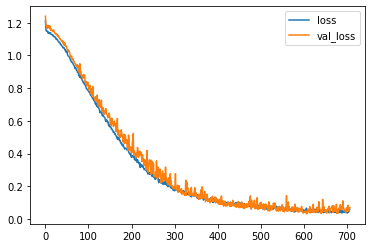

In [13]:
dataset[["loss", "val_loss"]].plot()

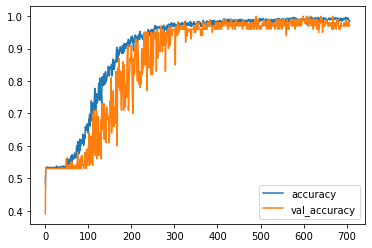

In [14]:
dataset[["accuracy", "val_accuracy"]].plot()

In [20]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("The test_loss is: {}, and the test_accuracy is: {}".format(test_loss, test_accuracy))

100/100 [==============================] - 0s 98us/step
The test_loss is: 0.06927556594833732, and the test_accuracy is: 0.9700000286102295


In [30]:
y_predicted = model.predict(X_test)

In [38]:
y_predicted

array([[3.79015728e-06, 8.40862704e-05, 1.37677560e-07, 9.99912024e-01],
       [8.10474812e-05, 3.08462040e-05, 4.75996176e-09, 9.99888062e-01],
       [3.99765995e-05, 9.62089658e-01, 7.67780861e-09, 3.78702730e-02],
       [1.89204923e-06, 4.01202078e-06, 2.16415458e-07, 9.99993920e-01],
       [1.35709152e-01, 6.90143497e-04, 5.85036901e-07, 8.63600194e-01],
       [5.36636981e-05, 5.63058376e-01, 9.00294950e-09, 4.36888009e-01],
       [1.12405189e-07, 5.43353917e-06, 4.61152921e-10, 9.99994397e-01],
       [7.93870058e-05, 5.97972074e-04, 5.31805222e-09, 9.99322653e-01],
       [1.22004358e-05, 9.91738617e-01, 4.58422328e-11, 8.24928191e-03],
       [8.72495413e-01, 3.32559482e-03, 7.87401646e-08, 1.24178842e-01],
       [5.91942808e-07, 1.32564455e-04, 7.64794361e-09, 9.99866843e-01],
       [2.99898402e-05, 9.28977787e-01, 3.52384347e-07, 7.09918439e-02],
       [5.88483715e-07, 7.48460443e-05, 2.04894679e-08, 9.99924541e-01],
       [2.99428052e-06, 3.19423743e-05, 7.27898225e